In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = r"/content/fitness_data_medium.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display first few rows of the dataset
print("\nDataset Preview:")
print(df.head())

# Display column names
print("\nColumn Names:", df.columns)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              75000 non-null  object 
 1   age                  75000 non-null  int64  
 2   gender               75000 non-null  object 
 3   height_cm            75000 non-null  float64
 4   weight_kg            75000 non-null  float64
 5   bmi                  75000 non-null  float64
 6   activity_level       75000 non-null  object 
 7   steps_count          75000 non-null  int64  
 8   heart_rate_avg       75000 non-null  float64
 9   calories_burned      75000 non-null  int64  
 10  sleep_hours          75000 non-null  float64
 11  workout_duration     75000 non-null  int64  
 12  workout_intensity    75000 non-null  object 
 13  vo2_max              75000 non-null  float64
 14  muscle_mass_percent  75000 non-null  float64
 15  fat_percentage       7

In [2]:
from sklearn.preprocessing import LabelEncoder

# Check for missing values
print("Missing Values Before Cleaning:\n", df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Encode categorical variables
if 'gender' in df.columns:
    le = LabelEncoder()
    df['gender'] = le.fit_transform(df['gender'])  # Convert 'Male'/'Female' to 0/1

# Verify if 'workout_intensity' exists before processing
if 'workout_intensity' in df.columns:
    intensity_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
    df['workout_intensity'] = df['workout_intensity'].map(intensity_mapping)
else:
    print("⚠️ Warning: 'workout_intensity' column is missing in the dataset!")

# Check if 'stress' column exists before encoding
if 'stress_level' in df.columns:
    stress_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
    df['stress_level'] = df['stress_level'].map(stress_mapping)
else:
    print("⚠️ Warning: 'stress' column is missing in the dataset!")

# Display processed dataset info
print("\nProcessed Dataset Info:")
print(df.info())

# Display first few rows after preprocessing
print("\nDataset Preview After Preprocessing:")
print(df.head())


Missing Values Before Cleaning:
 user_id                0
age                    0
gender                 0
height_cm              0
weight_kg              0
bmi                    0
activity_level         0
steps_count            0
heart_rate_avg         0
calories_burned        0
sleep_hours            0
workout_duration       0
workout_intensity      0
vo2_max                0
muscle_mass_percent    0
fat_percentage         0
hydration_level        0
stress_level           0
fitness_goal           0
progress_score         0
injury_risk            0
anomaly_detected       0
dtype: int64

Processed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              75000 non-null  object 
 1   age                  75000 non-null  int64  
 2   gender               75000 non-null  int64  
 3   height_cm      

In [3]:
print(df.dtypes)

user_id                 object
age                      int64
gender                   int64
height_cm              float64
weight_kg              float64
bmi                    float64
activity_level          object
steps_count              int64
heart_rate_avg         float64
calories_burned          int64
sleep_hours            float64
workout_duration         int64
workout_intensity        int64
vo2_max                float64
muscle_mass_percent    float64
fat_percentage         float64
hydration_level        float64
stress_level             int64
fitness_goal            object
progress_score         float64
injury_risk              int64
anomaly_detected         int64
dtype: object


In [4]:
# Convert user_id to numeric by removing 'U' and converting to integer
df["user_id"] = df["user_id"].str.replace("U", "").astype(int)
# Convert activity_level and fitness_goal to numeric values
df["activity_level"] = df["activity_level"].map({"Low": 1, "Moderate": 2, "High": 3})
df["fitness_goal"] = df["fitness_goal"].map({"Weight Loss": 1, "Muscle Gain": 2, "Endurance": 3, "General Fitness": 4})

# Now check data types again
print(df.dtypes)

user_id                  int64
age                      int64
gender                   int64
height_cm              float64
weight_kg              float64
bmi                    float64
activity_level         float64
steps_count              int64
heart_rate_avg         float64
calories_burned          int64
sleep_hours            float64
workout_duration         int64
workout_intensity        int64
vo2_max                float64
muscle_mass_percent    float64
fat_percentage         float64
hydration_level        float64
stress_level             int64
fitness_goal             int64
progress_score         float64
injury_risk              int64
anomaly_detected         int64
dtype: object


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define Features (X) and Targets (y1 for VO2_max, y2 for progress_score)
features = ["age", "gender", "bmi", "steps_count", "heart_rate_avg", "calories_burned", "stress_level", "hydration_level", "workout_intensity"]
target1 = "vo2_max"
target2 = "progress_score"

# Extract Features and Targets
X = df[features]
y1 = df[target1]  # Target for VO2_max
y2 = df[target2]  # Target for progress_score

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Scale the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y1_train shape (VO2_max):", y1_train.shape)
print("y2_train shape (progress_score):", y2_train.shape)


X_train shape: (60000, 9)
X_test shape: (15000, 9)
y1_train shape (VO2_max): (60000,)
y2_train shape (progress_score): (60000,)


In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Initialize Models
print("\n[Creating Models]")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
print("✅ Random Forest Model Created.")

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
print("✅ Gradient Boosting Model Created.")

mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
print("✅ Neural Network Model Created.")

# Training the models
print("\n[Training Models]")

print("⏳ Training Random Forest Regressor...")
rf_model.fit(X_train, y1_train)
print("✅ Random Forest Training Completed.\n")

print("⏳ Training Gradient Boosting Regressor...")
gb_model.fit(X_train, y1_train)
print("✅ Gradient Boosting Training Completed.\n")

print("⏳ Training Neural Network Regressor...")
mlp_model.fit(X_train_scaled, y1_train)  # Neural Network requires scaled data
print("✅ Neural Network Training Completed.\n")



[Creating Models]
✅ Random Forest Model Created.
✅ Gradient Boosting Model Created.
✅ Neural Network Model Created.

[Training Models]
⏳ Training Random Forest Regressor...
✅ Random Forest Training Completed.

⏳ Training Gradient Boosting Regressor...
✅ Gradient Boosting Training Completed.

⏳ Training Neural Network Regressor...
✅ Neural Network Training Completed.



In [28]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Predictions for VO2_max
print("\n[Evaluating Models for VO2_max]")

rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
mlp_preds = mlp_model.predict(X_test_scaled)  # Neural Network requires scaled data

# Compute MSE and R² scores
results = {
    "Model": ["Random Forest", "Gradient Boosting", "Neural Network"],
    "MSE": [
        mean_squared_error(y1_test, rf_preds),
        mean_squared_error(y1_test, gb_preds),
        mean_squared_error(y1_test, mlp_preds)
    ],
    "R² Score": [
        r2_score(y1_test, rf_preds),
        r2_score(y1_test, gb_preds),
        r2_score(y1_test, mlp_preds)
    ]
}

# Create DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results in a formatted table
print("\n📊 Model Evaluation Results for VO2_max:\n")
print(results_df)

# Find the best model based on highest R² Score
best_model = results_df.loc[results_df["R² Score"].idxmax(), "Model"]
best_r2 = results_df["R² Score"].max()

print(f"\n🏆 The best model for predicting VO2_max is: **{best_model}** with R² Score: {best_r2:.4f}\n")


[Evaluating Models for VO2_max]

📊 Model Evaluation Results for VO2_max:

               Model         MSE  R² Score
0      Random Forest   77.598465 -0.029318
1  Gradient Boosting  125.623753 -0.666357
2     Neural Network   76.455332 -0.014154

🏆 The best model for predicting VO2_max is: **Neural Network** with R² Score: -0.0142



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [21]:
# Initialize Models for progress_score
print("\n[Creating Models for progress_score]")

rf_model_y2 = RandomForestRegressor(n_estimators=100, random_state=42)
print("✅ Random Forest Model Created.")

gb_model_y2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
print("✅ Gradient Boosting Model Created.")

mlp_model_y2 = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
print("✅ Neural Network Model Created.")

# Training the models for progress_score
print("\n[Training Models for progress_score]")

print("⏳ Training Random Forest Regressor...")
rf_model_y2.fit(X_train, y2_train)
print("✅ Random Forest Training Completed.\n")

print("⏳ Training Gradient Boosting Regressor...")
gb_model_y2.fit(X_train, y2_train)
print("✅ Gradient Boosting Training Completed.\n")

print("⏳ Training Neural Network Regressor...")
mlp_model_y2.fit(X_train_scaled, y2_train)  # Neural Network requires scaled data
print("✅ Neural Network Training Completed.\n")




[Creating Models for progress_score]
✅ Random Forest Model Created.
✅ Gradient Boosting Model Created.
✅ Neural Network Model Created.

[Training Models for progress_score]
⏳ Training Random Forest Regressor...
✅ Random Forest Training Completed.

⏳ Training Gradient Boosting Regressor...
✅ Gradient Boosting Training Completed.

⏳ Training Neural Network Regressor...
✅ Neural Network Training Completed.



In [29]:
# Predictions for progress_score
print("\n[Evaluating Models for progress_score]")

rf_preds_y2 = rf_model_y2.predict(X_test)
gb_preds_y2 = gb_model_y2.predict(X_test)
mlp_preds_y2 = mlp_model_y2.predict(X_test_scaled)  # Neural Network requires scaled data

# Compute MSE and R² scores
results_y2 = {
    "Model": ["Random Forest", "Gradient Boosting", "Neural Network"],
    "MSE": [
        mean_squared_error(y2_test, rf_preds_y2),
        mean_squared_error(y2_test, gb_preds_y2),
        mean_squared_error(y2_test, mlp_preds_y2)
    ],
    "R² Score": [
        r2_score(y2_test, rf_preds_y2),
        r2_score(y2_test, gb_preds_y2),
        r2_score(y2_test, mlp_preds_y2)
    ]
}

# Create DataFrame for better visualization
results_df_y2 = pd.DataFrame(results_y2)

# Display results in a formatted table
print("\n📊 Model Evaluation Results for progress_score:\n")
print(results_df_y2)

# Find the best model based on highest R² Score
best_model_y2 = results_df_y2.loc[results_df_y2["R² Score"].idxmax(), "Model"]
best_r2_y2 = results_df_y2["R² Score"].max()

print(f"\n🏆 The best model for predicting progress_score is: **{best_model_y2}** with R² Score: {best_r2_y2:.4f}\n")




[Evaluating Models for progress_score]

📊 Model Evaluation Results for progress_score:

               Model         MSE  R² Score
0      Random Forest  854.800305 -0.023625
1  Gradient Boosting  835.556969 -0.000582
2     Neural Network  850.275941 -0.018208

🏆 The best model for predicting progress_score is: **Gradient Boosting** with R² Score: -0.0006



<ipython-input-30-aa1edd1507e7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df_y2["Model"], y=results_df_y2["MSE"], palette="Blues_r")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


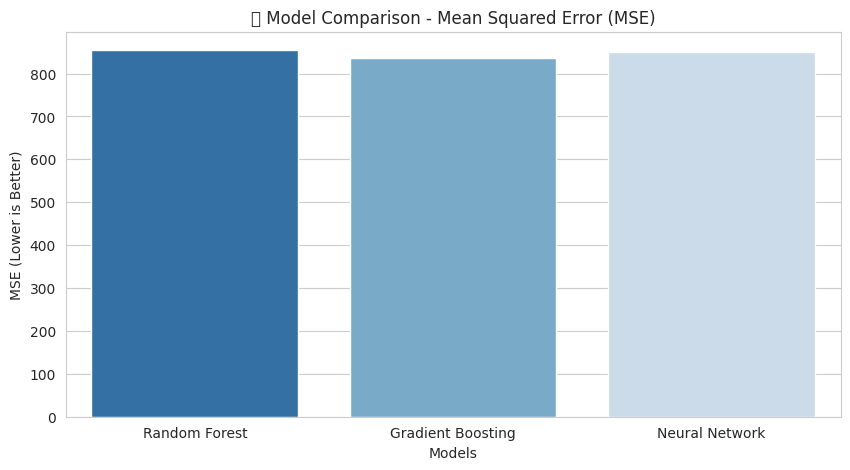

<ipython-input-30-aa1edd1507e7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df_y2["Model"], y=results_df_y2["R² Score"], palette="Greens_r")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


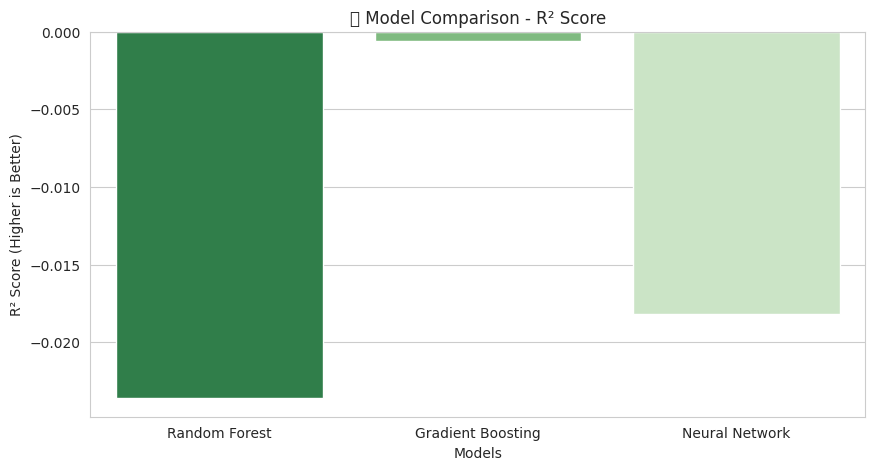

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


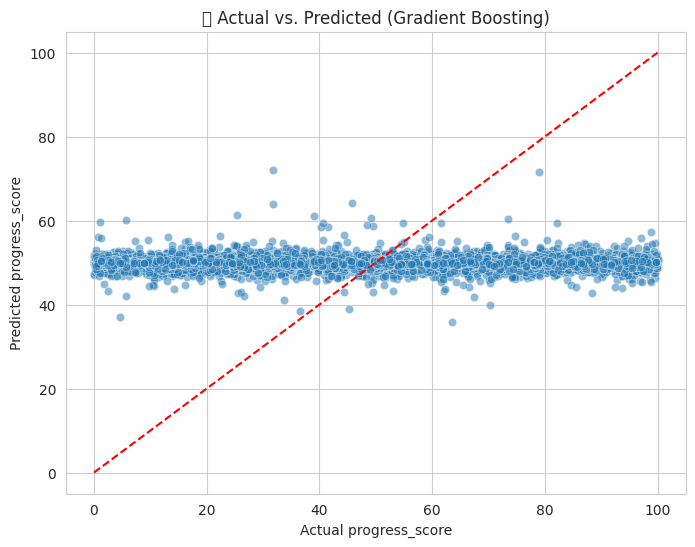

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Bar Plot for MSE
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df_y2["Model"], y=results_df_y2["MSE"], palette="Blues_r")
plt.title("📉 Model Comparison - Mean Squared Error (MSE)")
plt.ylabel("MSE (Lower is Better)")
plt.xlabel("Models")
plt.show()

# Bar Plot for R² Score
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df_y2["Model"], y=results_df_y2["R² Score"], palette="Greens_r")
plt.title("📈 Model Comparison - R² Score")
plt.ylabel("R² Score (Higher is Better)")
plt.xlabel("Models")
plt.show()

# Scatter Plot: Actual vs. Predicted (Best Model)
best_preds_y2 = None

if best_model_y2 == "Random Forest":
    best_preds_y2 = rf_preds_y2
elif best_model_y2 == "Gradient Boosting":
    best_preds_y2 = gb_preds_y2
elif best_model_y2 == "Neural Network":
    best_preds_y2 = mlp_preds_y2

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y2_test, y=best_preds_y2, alpha=0.5)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color="red", linestyle="dashed")  # 45-degree line
plt.xlabel("Actual progress_score")
plt.ylabel("Predicted progress_score")
plt.title(f"🎯 Actual vs. Predicted ({best_model_y2})")
plt.show()


<ipython-input-31-20a10eacd335>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["MSE"], palette="Blues_r")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


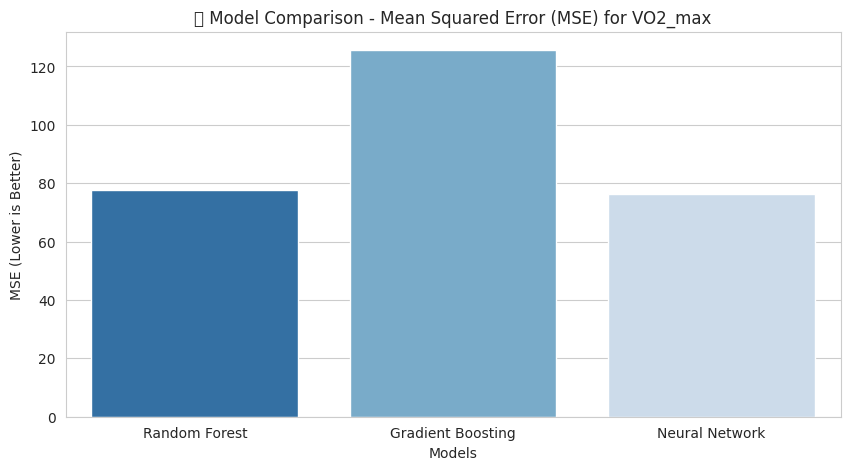

<ipython-input-31-20a10eacd335>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["R² Score"], palette="Greens_r")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


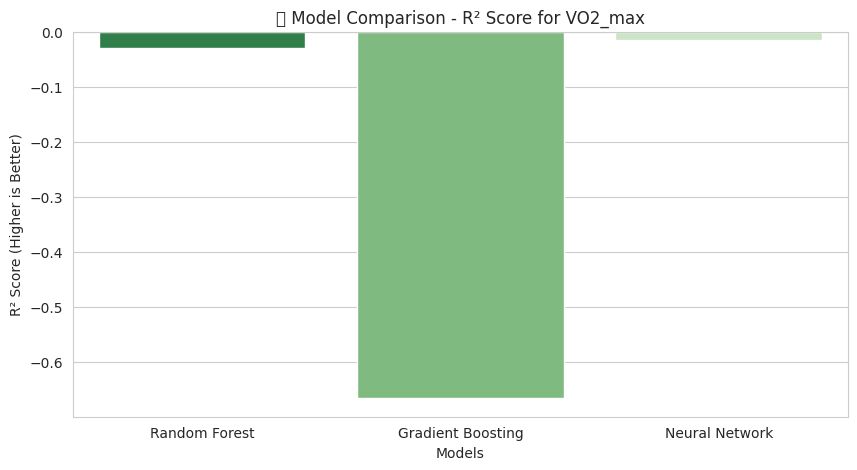

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


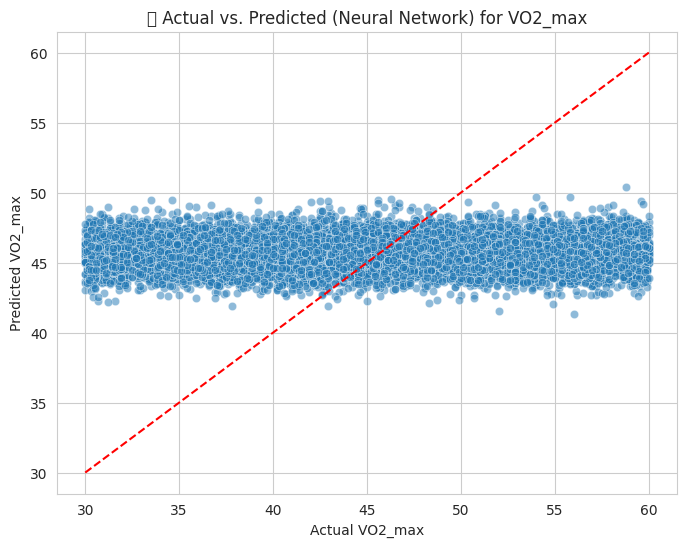

In [31]:
# Bar Plot for MSE (VO2_max)
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df["Model"], y=results_df["MSE"], palette="Blues_r")
plt.title("📉 Model Comparison - Mean Squared Error (MSE) for VO2_max")
plt.ylabel("MSE (Lower is Better)")
plt.xlabel("Models")
plt.show()

# Bar Plot for R² Score (VO2_max)
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df["Model"], y=results_df["R² Score"], palette="Greens_r")
plt.title("📈 Model Comparison - R² Score for VO2_max")
plt.ylabel("R² Score (Higher is Better)")
plt.xlabel("Models")
plt.show()

# Scatter Plot: Actual vs. Predicted (Best Model for VO2_max)
best_preds_y1 = None

if best_model == "Random Forest":
    best_preds_y1 = rf_preds
elif best_model == "Gradient Boosting":
    best_preds_y1 = gb_preds
elif best_model == "Neural Network":
    best_preds_y1 = mlp_preds

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y1_test, y=best_preds_y1, alpha=0.5)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color="red", linestyle="dashed")  # 45-degree line
plt.xlabel("Actual VO2_max")
plt.ylabel("Predicted VO2_max")
plt.title(f"🎯 Actual vs. Predicted ({best_model}) for VO2_max")
plt.show()


In [32]:
import numpy as np

# Creating a sample test input (Modify values based on dataset ranges)
sample_input = np.array([[30, 1, 22.5, 8000, 85, 250, 2, 3, 70]])  # Example input
sample_input_scaled = scaler.transform(sample_input)  # Scale for MLP

# Predict VO2_max using the best model
print("\n🔍 Testing Best VO2_max Model:")
if best_model == "Random Forest":
    vo2_prediction = rf_model.predict(sample_input)[0]
elif best_model == "Gradient Boosting":
    vo2_prediction = gb_model.predict(sample_input)[0]
elif best_model == "Neural Network":
    vo2_prediction = mlp_model.predict(sample_input_scaled)[0]

print(f"✅ Predicted VO2_max: {vo2_prediction:.2f}")

# Predict progress_score using the best model
print("\n🔍 Testing Best progress_score Model:")
if best_model_y2 == "Random Forest":
    progress_prediction = rf_model_y2.predict(sample_input)[0]
elif best_model_y2 == "Gradient Boosting":
    progress_prediction = gb_model_y2.predict(sample_input)[0]
elif best_model_y2 == "Neural Network":
    progress_prediction = mlp_model_y2.predict(sample_input_scaled)[0]

print(f"✅ Predicted progress_score: {progress_prediction:.2f}")



🔍 Testing Best VO2_max Model:
✅ Predicted VO2_max: 74.20

🔍 Testing Best progress_score Model:
✅ Predicted progress_score: 43.93


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [33]:
import joblib

# Save best VO2_max model
if best_model == "Random Forest":
    joblib.dump(rf_model, "best_vo2_model.pkl")
elif best_model == "Gradient Boosting":
    joblib.dump(gb_model, "best_vo2_model.pkl")
elif best_model == "Neural Network":
    joblib.dump(mlp_model, "best_vo2_model.pkl")

print(f"✅ Best VO2_max model ({best_model}) saved as 'best_vo2_model.pkl'.")

# Save best progress_score model
if best_model_y2 == "Random Forest":
    joblib.dump(rf_model_y2, "best_progress_model.pkl")
elif best_model_y2 == "Gradient Boosting":
    joblib.dump(gb_model_y2, "best_progress_model.pkl")
elif best_model_y2 == "Neural Network":
    joblib.dump(mlp_model_y2, "best_progress_model.pkl")

print(f"✅ Best progress_score model ({best_model_y2}) saved as 'best_progress_model.pkl'.")


✅ Best VO2_max model (Neural Network) saved as 'best_vo2_model.pkl'.
✅ Best progress_score model (Gradient Boosting) saved as 'best_progress_model.pkl'.


In [34]:
# Load the saved models
loaded_vo2_model = joblib.load("best_vo2_model.pkl")
loaded_progress_model = joblib.load("best_progress_model.pkl")

print("\n✅ Models loaded successfully.")

# Define a new sample input (Modify values as needed)
new_sample = np.array([[28, 0, 24.0, 7000, 78, 220, 1, 4, 80]])  # Example input
new_sample_scaled = scaler.transform(new_sample)  # Scale for Neural Network

# Predict using the loaded VO2_max model
print("\n🔍 Predicting VO2_max with the loaded model:")
if best_model == "Random Forest":
    new_vo2_pred = loaded_vo2_model.predict(new_sample)[0]
elif best_model == "Gradient Boosting":
    new_vo2_pred = loaded_vo2_model.predict(new_sample)[0]
elif best_model == "Neural Network":
    new_vo2_pred = loaded_vo2_model.predict(new_sample_scaled)[0]

print(f"✅ Predicted VO2_max: {new_vo2_pred:.2f}")

# Predict using the loaded progress_score model
print("\n🔍 Predicting progress_score with the loaded model:")
if best_model_y2 == "Random Forest":
    new_progress_pred = loaded_progress_model.predict(new_sample)[0]
elif best_model_y2 == "Gradient Boosting":
    new_progress_pred = loaded_progress_model.predict(new_sample)[0]
elif best_model_y2 == "Neural Network":
    new_progress_pred = loaded_progress_model.predict(new_sample_scaled)[0]

print(f"✅ Predicted progress_score: {new_progress_pred:.2f}")



✅ Models loaded successfully.

🔍 Predicting VO2_max with the loaded model:
✅ Predicted VO2_max: 78.96

🔍 Predicting progress_score with the loaded model:
✅ Predicted progress_score: 47.13


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
